In [1]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import seaborn as sns
sns.set_context('paper')
import sys
sys.path.insert(0, '../snow_terrain_tiles/')
from dem_utils import recursive_rastersstats_to_dict
from mpl_toolkits.axes_grid1 import make_axes_locatable
from directional_terrain_analysis import make_hillshade
import os
import matplotlib.gridspec as gridspec

In [2]:
d1 = recursive_rastersstats_to_dict('../subsets/')
d2 = recursive_rastersstats_to_dict('../subsets/', '*dem.tif')

Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.
Generating Hillshade...
Generating Hillshade...Complete.


/home/cparr/miniconda3/envs/masters/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


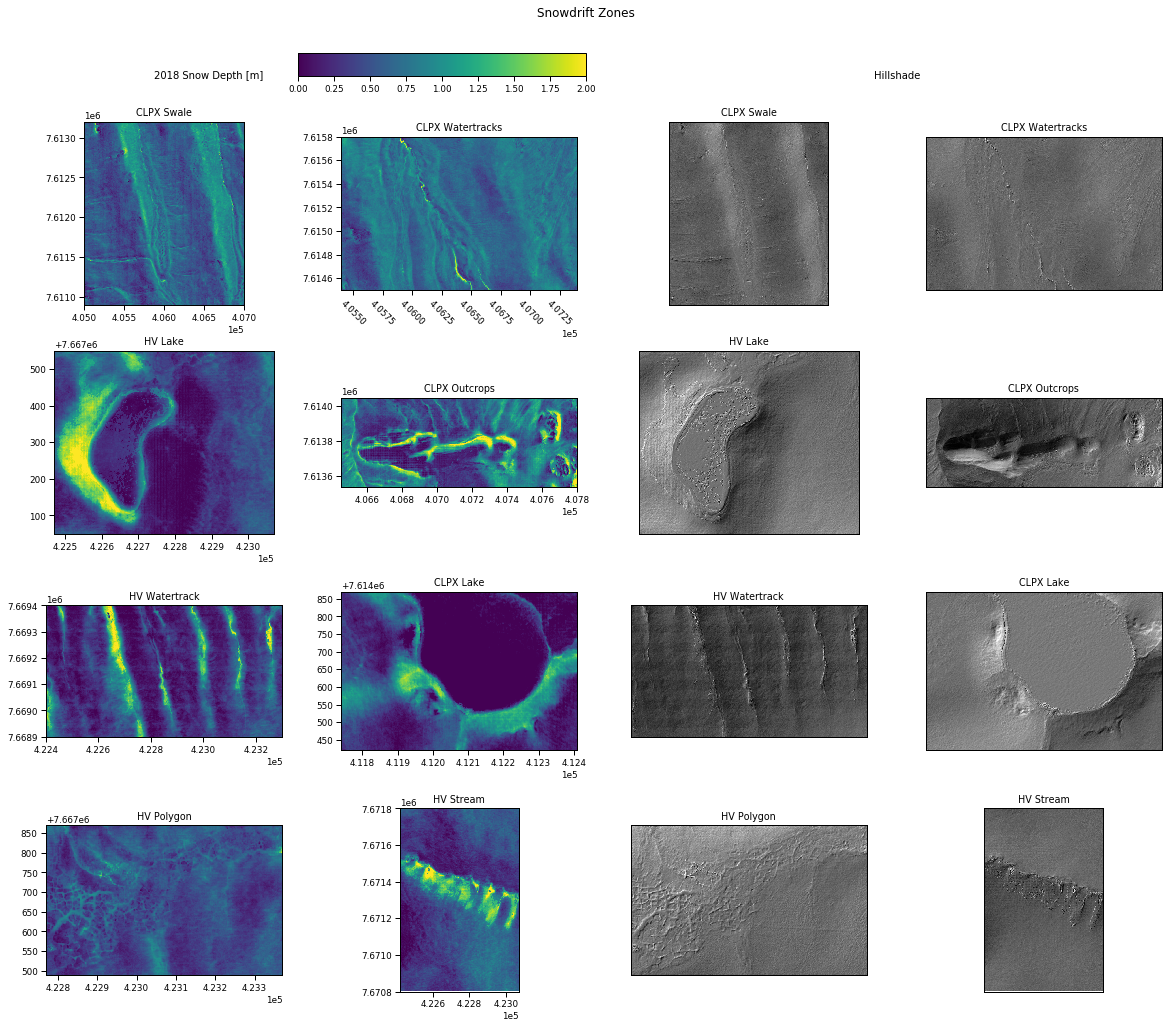

In [56]:

fig = plt.figure(figsize=(20, 16))
outer = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.2)


inner1 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[0], wspace=0.25, hspace=0.25)


inner2 = gridspec.GridSpecFromSubplotSpec(4, 2,
                    subplot_spec=outer[1], wspace=0.25, hspace=0.25)

arrs = []
titles = []
for i in range(2):
    if i == 0:
        d = d1
        g = inner1
    else:
        d = d2
        g = inner2
    for k in d.keys():
        arrs.append(d[k]['arr'])
        titles.append(k)
 

ptitles = [(os.path.basename(t).split('_')[0].upper() + ' ' +  os.path.basename(t).split('_')[1].capitalize()) for t in titles]
    
for j in range(len(titles)):
    if j < 8:
        ax = plt.Subplot(fig, inner1[j])
        src = rasterio.open(list(d1.keys())[j])        
        im = show(src, ax=ax, vmin=0, vmax=2, with_bounds=True)
        ax.ticklabel_format(axis='both', style='sci', scilimits=(0,3))
        ax.set_title(ptitles[j])
        fig.add_subplot(ax)
    else:
        ax = plt.Subplot(fig, inner2[j - 8])
        vmin = np.nanmin(arrs[j])
        vmax = np.nanmax(arrs[j])
        ax.imshow(make_hillshade(arrs[j]*3, 315, 30), cmap='Greys')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(ptitles[j])
        fig.add_subplot(ax)
             

fig.text(0.2, 0.92, "2018 Snow Depth [m]", va="center", ha="left")
fig.text(0.7, 0.92, "Hillshade", va="center", ha="left")
fig.suptitle('Snowdrift Zones')


plt.setp(fig.axes[1].get_xticklabels(), rotation=315)


#divider = make_axes_locatable(fig.axes[0])
#cax = divider.append_axes('top', size='20%')
cax = fig.add_axes([0.3, 0.92, 0.2, 0.02])
fig.colorbar(mappable=im.get_children()[-2], cax=cax, orientation='horizontal')

fig.show()

# fig.subplots_adjust(top=0.8)
plt.savefig('../../scratch/studyareas.png', bbox_inches='tight', dpi=300)

